In [1]:
# imorting related libraries 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import geopandas as gpd
import us

In [2]:
# importing the dataset
nors = pd.read_csv('NORS.csv',low_memory=False)

In [3]:
# exploring the data
nors.sample(10)

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Info On Hospitalizations,Deaths,Info On Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type
26001,2012,7,Kentucky,Environmental contamination other than food/water,Campylobacter jejuni,NaN,Confirmed,NaN,5,0.0,5,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN
3682,1999,12,Maryland,Food,NaN,NaN,NaN,Restaurant: Other,3,0.0,3,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN
23181,2011,12,Tennessee,Person-to-person,Shigella sonnei,NaN,Confirmed,School/college/university,9,2.0,9,0.0,9,NaN,NaN,NaN,NaN,NaN,NaN
26019,2012,8,Idaho,Water,Cryptosporidium unknown,NaN,Confirmed,Park - Amusement/Waterpark,2,0.0,2,0.0,2,NaN,NaN,NaN,Recreational water -- treated,Pool - Other Swimming Pool,NaN
31323,2014,1,Texas,Person-to-person,NaN,NaN,NaN,School/college/university,45,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
64006,2023,3,Kentucky,Person-to-person,Norovirus unknown,NaN,Suspected,Long-term care/nursing home/assisted living fa...,14,1.0,14,0.0,14,NaN,NaN,NaN,NaN,NaN,NaN
51411,2018,11,California,Food,NaN,NaN,NaN,Restaurant: Sit-down dining,3,0.0,3,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN
36368,2015,2,West Virginia,Person-to-person,NaN,NaN,NaN,Long-term care/nursing home/assisted living fa...,17,0.0,17,0.0,17,NaN,NaN,NaN,NaN,NaN,NaN
32023,2014,2,South Carolina,Person-to-person,Norovirus unknown,NaN,Suspected,School/college/university,20,0.0,20,0.0,20,NaN,NaN,NaN,NaN,NaN,NaN
27919,2013,2,Tennessee,Person-to-person,Norovirus,NaN,Suspected,Long-term care/nursing home/assisted living fa...,40,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
nors.describe()

,Year,Month,Hospitalizations,Deaths
count,66713.000000,66713.000000,58155.000000,58785.000000
mean,2012.696926,5.692009,0.825501,0.042375
std,7.546412,3.736764,4.164555,0.436484
min,1971.000000,1.000000,0.000000,0.000000
25%,2009.000000,2.000000,0.000000,0.000000
50%,2014.000000,5.000000,0.000000,0.000000
75%,2018.000000,9.000000,1.000000,0.000000
max,2023.000000,12.000000,308.000000,50.000000


In [5]:
nors.describe(include=object)

,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Info On Hospitalizations,Info On Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type
count,66713,66713,50375,16470,50375,60804,66713,58480,58463,12446,2750,11705,3106,2730,587
unique,58,6,787,765,57,597,476,356,355,3779,518,25,10,56,61
top,Wisconsin,Person-to-person,Norovirus,unknown,Confirmed,Long-term care/nursing home/assisted living fa...,2,0,0,"oysters, raw",chicken,Multiple,Drinking water,Community,Poultry
freq,3912,32414,9668,4534,24889,21224,5966,6475,5859,264,253,5939,1256,693,184


In [6]:
nors.isnull().sum()

## nulls in the dataset have meaning, thus it cant be replaced or dropped

Year                                0
Month                               0
State                               0
Primary Mode                        0
Etiology                        16338
Serotype or Genotype            50243
Etiology Status                 16338
Setting                          5909
Illnesses                           0
Hospitalizations                 8558
Info On Hospitalizations         8233
Deaths                           7928
Info On Deaths                   8250
Food Vehicle                    54267
Food Contaminated Ingredient    63963
IFSAC Category                  55008
Water Exposure                  63607
Water Type                      63983
Animal Type                     66126
dtype: int64

In [7]:
# Cases per year
nors[['Year']].value_counts().sort_index()

## most of the cases are between 1998 - 2023

Year
1971      20
1972      30
1973      27
1974      24
1975      26
1976      36
1977      37
1978      41
1979      55
1980      68
1981      43
1982      73
1983      69
1984      41
1985      29
1986      30
1987      32
1988      36
1989      32
1990      30
1991      44
1992      43
1993      32
1994      29
1995      43
1996      27
1997      22
1998    1354
1999    1376
2000    1465
2001    1295
2002    1372
2003    1127
2004    1382
2005    1016
2006    1310
2007    1209
2008    1094
2009    2242
2010    3034
2011    3084
2012    3915
2013    3975
2014    3934
2015    4214
2016    4331
2017    4148
2018    4171
2019    4199
2020    1642
2021    2018
2022    2945
2023    3842
Name: count, dtype: int64

In [8]:
# truncating the year range to 1998 - 2023
nors_df = nors[nors['Year']>=1998]

In [9]:
nors_df

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Info On Hospitalizations,Deaths,Info On Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type
1019,1998,1,Florida,Food,Campylobacter unknown,NaN,Suspected,Restaurant: Other,3,NaN,NaN,NaN,NaN,"tuna, raw;salmon, raw",NaN,Fish,NaN,NaN,NaN
1020,1998,1,Ohio,Food,NaN,NaN,NaN,Restaurant: Other,2,0.0,2,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN
1021,1998,1,California,Food,NaN,NaN,NaN,Other,112,0.0,166,0.0,166,custard,NaN,Multiple,NaN,NaN,NaN
1022,1998,1,California,Food,NaN,NaN,NaN,Restaurant: Other,35,0.0,45,0.0,45,NaN,NaN,NaN,NaN,NaN,NaN
1023,1998,1,Pennsylvania,Food,NaN,NaN,NaN,Other,23,0.0,38,0.0,38,"ice cream, unspecified;cake, unspecified",NaN,Multiple,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66708,2023,12,Tennessee,Person-to-person,Norovirus unknown,NaN,Confirmed,Long-term care/nursing home/assisted living fa...,19,NaN,0,0.0,19,NaN,NaN,NaN,NaN,NaN,NaN
66709,2023,12,Tennessee,Indeterminate/unknown,Norovirus Genogroup II,GII.P untypeable GII.4 untypeable,Suspected,Event space,18,0.0,18,0.0,18,NaN,NaN,NaN,NaN,NaN,NaN
66710,2023,12,Minnesota,Person-to-person,Norovirus unknown,NaN,Suspected,School/college/university,7,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
66711,2023,12,Oregon,Person-to-person,NaN,NaN,NaN,School/college/university,97,0.0,97,0.0,97,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
nors_df.isnull().sum()

Year                                0
Month                               0
State                               0
Primary Mode                        0
Etiology                        16305
Serotype or Genotype            49314
Etiology Status                 16305
Setting                          5907
Illnesses                           0
Hospitalizations                 7876
Info On Hospitalizations         7214
Deaths                           7724
Info On Deaths                   7231
Food Vehicle                    53248
Food Contaminated Ingredient    62944
IFSAC Category                  53989
Water Exposure                  63607
Water Type                      63905
Animal Type                     65107
dtype: int64

In [11]:
# no. of duplicates in the dataset
nors_df.duplicated().sum()

np.int64(1427)

In [12]:
# droping duplicates
nors_df.drop_duplicates(inplace = True)

In [13]:
nors_df.duplicated().sum()

np.int64(0)

In [14]:
# removing the none useful columns
nors_df.drop(columns=['Serotype or Genotype','Etiology Status'],inplace= True)

In [15]:
nors_df

,Year,Month,State,Primary Mode,Etiology,Setting,Illnesses,Hospitalizations,Info On Hospitalizations,Deaths,Info On Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type
1019,1998,1,Florida,Food,Campylobacter unknown,Restaurant: Other,3,NaN,NaN,NaN,NaN,"tuna, raw;salmon, raw",NaN,Fish,NaN,NaN,NaN
1020,1998,1,Ohio,Food,NaN,Restaurant: Other,2,0.0,2,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN
1021,1998,1,California,Food,NaN,Other,112,0.0,166,0.0,166,custard,NaN,Multiple,NaN,NaN,NaN
1022,1998,1,California,Food,NaN,Restaurant: Other,35,0.0,45,0.0,45,NaN,NaN,NaN,NaN,NaN,NaN
1023,1998,1,Pennsylvania,Food,NaN,Other,23,0.0,38,0.0,38,"ice cream, unspecified;cake, unspecified",NaN,Multiple,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66708,2023,12,Tennessee,Person-to-person,Norovirus unknown,Long-term care/nursing home/assisted living fa...,19,NaN,0,0.0,19,NaN,NaN,NaN,NaN,NaN,NaN
66709,2023,12,Tennessee,Indeterminate/unknown,Norovirus Genogroup II,Event space,18,0.0,18,0.0,18,NaN,NaN,NaN,NaN,NaN,NaN
66710,2023,12,Minnesota,Person-to-person,Norovirus unknown,School/college/university,7,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
66711,2023,12,Oregon,Person-to-person,NaN,School/college/university,97,0.0,97,0.0,97,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# number of outbreaks per year
sort_by_years = nors_df.groupby('Year')[['Illnesses']].count()

In [17]:
# exporting the sorted table
sort_by_years.to_csv('nors_years_sorted.csv')

In [18]:
# replacing the comma with empty string so it can be converted from object to int
def comma_replace (table):
        return str(table).replace(',','')
        

In [19]:
# columns that need to be replaced and converte
nors_df['Illnesses'] = nors_df['Illnesses'].apply(comma_replace)
nors_df['Info On Hospitalizations'] = nors_df['Info On Hospitalizations'].apply(comma_replace)
nors_df['Info On Deaths'] = nors_df['Info On Deaths'].apply(comma_replace)

In [20]:
# replacing nulls with zeros
import numpy as np
nors_df['Hospitalizations'].replace(np.nan,0,inplace=True)
nors_df['Info On Hospitalizations'].replace(['nan',np.nan],0,inplace=True)
nors_df['Deaths'].replace(np.nan,0,inplace=True)
nors_df['Info On Deaths'].replace(['nan',np.nan],0,inplace=True)

In [21]:
nors_df.isnull().sum()

Year                                0
Month                               0
State                               0
Primary Mode                        0
Etiology                        15817
Setting                          5523
Illnesses                           0
Hospitalizations                    0
Info On Hospitalizations            0
Deaths                              0
Info On Deaths                      0
Food Vehicle                    51846
Food Contaminated Ingredient    61524
IFSAC Category                  52586
Water Exposure                  62182
Water Type                      62480
Animal Type                     63680
dtype: int64

In [22]:
nors_df= nors_df.astype({'Illnesses':int, 'Hospitalizations':int,'Deaths':int,'Info On Deaths':int,'Info On Hospitalizations':int})

In [23]:
nors_df.dtypes

Year                             int64
Month                            int64
State                           object
Primary Mode                    object
Etiology                        object
Setting                         object
Illnesses                        int64
Hospitalizations                 int64
Info On Hospitalizations         int64
Deaths                           int64
Info On Deaths                   int64
Food Vehicle                    object
Food Contaminated Ingredient    object
IFSAC Category                  object
Water Exposure                  object
Water Type                      object
Animal Type                     object
dtype: object

In [24]:
nors_df.sample(10)

,Year,Month,State,Primary Mode,Etiology,Setting,Illnesses,Hospitalizations,Info On Hospitalizations,Deaths,Info On Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type
60023,2022,1,Rhode Island,Food,NaN,Restaurant: Sit-down dining,3,0,3,0,3,grilled or fried chicken salad,NaN,Multiple,NaN,NaN,NaN
2335,1998,12,California,Food,NaN,Restaurant: Other,15,0,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN
61682,2022,4,Wisconsin,Person-to-person,Norovirus unknown,Long-term care/nursing home/assisted living fa...,76,0,76,0,76,NaN,NaN,NaN,NaN,NaN,NaN
43943,2017,1,Kansas,Person-to-person,Norovirus Genogroup II,School/college/university,17,0,17,0,17,NaN,NaN,NaN,NaN,NaN,NaN
22796,2011,11,South Carolina,Person-to-person,Norovirus Genogroup II,Long-term care/nursing home/assisted living fa...,156,4,156,1,156,NaN,NaN,NaN,NaN,NaN,NaN
21610,2011,3,Pennsylvania,Environmental contamination other than food/water,Norovirus unknown,NaN,35,0,7,0,7,NaN,NaN,NaN,NaN,NaN,NaN
62102,2022,7,Massachusetts,Food,Salmonella unknown,Restaurant: Sit-down dining,3,0,2,0,3,NaN,NaN,NaN,NaN,NaN,NaN
20527,2011,1,California,Food,Salmonella enterica,Other;Grocery store/bakery/deli/convenience store,7,0,7,0,7,carne asada,NaN,Multiple,NaN,NaN,NaN
40976,2016,3,Rhode Island,Person-to-person,Norovirus unknown,Child daycare/preschool,17,0,17,0,17,NaN,NaN,NaN,NaN,NaN,NaN
38973,2015,11,New Jersey,Food,NaN,Banquet Facility (food prepared and served on-...,57,0,40,0,40,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# number of outbreaks per state
nors_df.groupby('State')['Illnesses'].count()

State
Alabama                              876
Alaska                               204
Arizona                             1201
Arkansas                             156
California                          2898
Colorado                            1902
Connecticut                          987
Delaware                             135
District of Columbia                  98
Florida                             3026
Georgia                              681
Guam                                  27
Hawaii                               600
Idaho                                285
Illinois                            3377
Indiana                              665
Iowa                                 913
Kansas                               758
Kentucky                             860
Louisiana                            271
Maine                               1017
Maryland                            1022
Massachusetts                       2318
Michigan                            2948
Minnesota 

In [26]:
#This counts the number of reported outbreaks for each year and sorts them in chronological order. 
#It provides the total number of outbreaks that occurred annually between 1998 and 2023
outbreaks_by_year = pd.DataFrame(nors_df['Year'].value_counts().sort_index())
outbreaks_by_year.columns = ['Outbreaks']


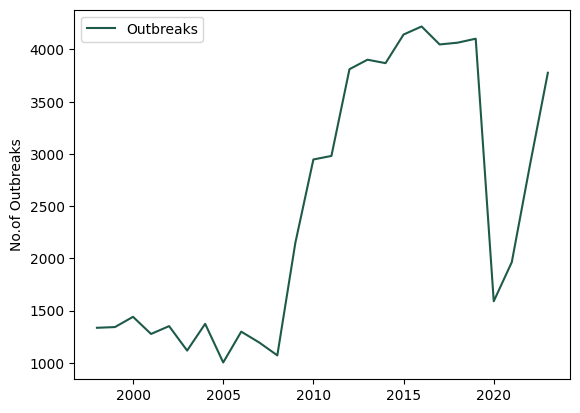

In [190]:
# outbreaks vs years plot
outbreaks_by_year.plot(color ='#1E5A4A',ylabel = 'No.of Outbreaks',y='Outbreaks' ,x= 'Year', xlabel='');

In [71]:
# adding the index as a column to count the outbreaks
nors_df = nors_df.reset_index()

In [29]:
nors_df.sample(5)

,index,Year,Month,State,Primary Mode,Etiology,Setting,Illnesses,Hospitalizations,Info On Hospitalizations,Deaths,Info On Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type
30670,32361,2014,3,Florida,Food,NaN,Restaurant: Sit-down dining,4,0,4,0,4,"steak, prime rib",NaN,Beef,NaN,NaN,NaN
57645,59968,2022,1,South Carolina,Person-to-person,Norovirus unknown,School/college/university,14,0,14,0,14,NaN,NaN,NaN,NaN,NaN,NaN
11612,12785,2007,1,Multistate,Food,Salmonella enterica,Private home/residence,81,9,81,0,81,"eggs, scrambled",egg,Eggs,NaN,NaN,NaN
25221,26810,2012,12,Michigan,Person-to-person,NaN,NaN,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
30293,31977,2014,2,Michigan,Food,NaN,Other,4,0,4,0,4,"tortilla, unspecified",NaN,Multiple,NaN,NaN,NaN


In [30]:
# effect of pathogens

sum_death_ill_outbreak = {'Info On Deaths':'sum','Illnesses':'sum','index':'count'}

pathogens_effects2 = nors_df.groupby('Etiology').agg(sum_death_ill_outbreak)

In [31]:
#Changing the column names to a descriptive names

pathogens_effects2.columns = ['Total Deaths', 'Total Illnesses', 'Total Outbreaks']

In [32]:
pathogens_effects2.sort_values('Total Outbreaks',ascending=False).head(10)

,Total Deaths,Total Illnesses,Total Outbreaks
Etiology,,,
Norovirus Genogroup II,256839,303297,9141
Norovirus,174347,282782,9090
Norovirus unknown,194003,232366,8528
Salmonella enterica,73236,100854,4109
Norovirus Genogroup I,91703,124839,4091
"Escherichia coli, Shiga toxin-producing",11741,15320,1208
Shigella sonnei,17423,23746,1106
Clostridium perfringens,24652,34386,926
Legionella pneumophila,2642,3365,711


In [33]:
pathogens_effects2 = pathogens_effects2.reset_index()

In [34]:
pathogens_effects = pathogens_effects2.sort_values('Total Deaths',ascending=False).head(5)


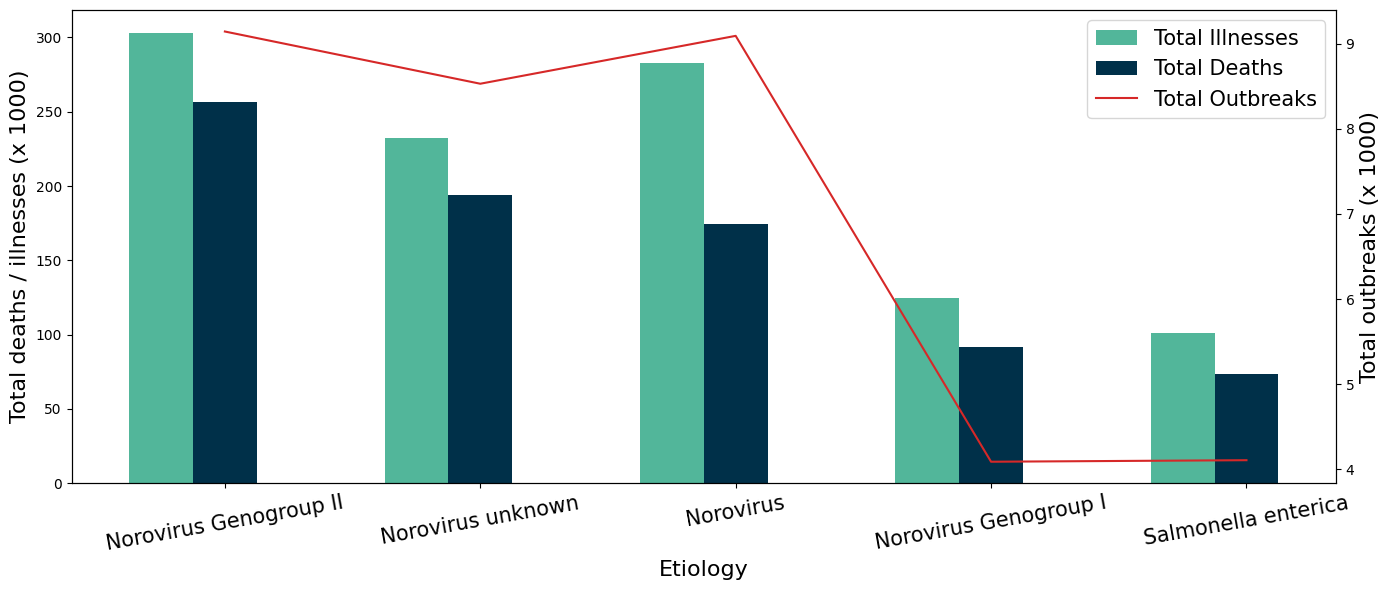

In [207]:
import numpy as np
import matplotlib.pyplot as plt

# number of rows
n = len(pathogens_effects['Etiology'])

# layout parameters - adjust to taste
spacing = 2   
bar_height = 0.5  

# Y positions for each group (one position per Etiology), spaced out
x = np.arange(0, n * spacing, spacing)

fig, ax = plt.subplots(figsize=(14, 6))

# Three bars per group, offset vertically so they don't overlap
b1 = ax.bar(
    x - bar_height,                     
    pathogens_effects['Total Illnesses']/1000,
    bar_height,                          
    label='Total Illnesses',
    color='#52b69a'
)

b2 = ax.bar(
    x,                                     
    pathogens_effects['Total Deaths']/1000,
    bar_height,
    label='Total Deaths',
    color='#003049')

# line chart

ax2 = ax.twinx()
b3 = ax2.plot(
    x,                        
    pathogens_effects['Total Outbreaks']/1000,
    label='Total Outbreaks',
    color='#d62828'
)


# Y labels and ticks
ax.set_xticks(x)

ax.set_xlabel('Etiology', fontsize=16)
ax.set_ylabel('Total deaths / illnesses (x 1000)', fontsize=16)
ax2.set_ylabel('Total outbreaks (x 1000)', fontsize=16)


# Legend and layout
# Combine legends from both axes
lines_labels = [ax.get_legend_handles_labels(), ax2.get_legend_handles_labels()]
lines = [h for lh, ll in lines_labels for h in lh]
labels = [l for lh, ll in lines_labels for l in ll]

# Single legend, upper left, stacked vertically
ax.legend(lines, labels, loc='upper right' ,  fontsize=15)
ax.set_xticklabels(pathogens_effects['Etiology'], rotation=10, fontsize=15)

plt.tight_layout()


In [83]:
# which mode of infection is the most frequent?

modes_df = nors_df.groupby('Primary Mode').agg({"index":"count"})/1000

<Axes: xlabel='Total Outbreaks x 1000', ylabel='Primery  Mode'>

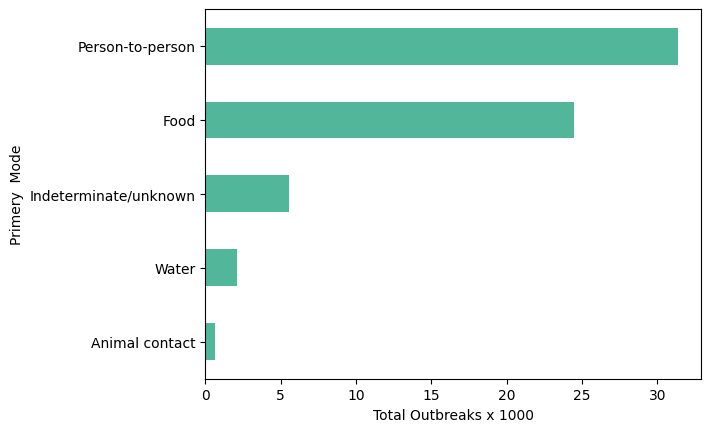

In [84]:
modes_df.sort_values(by = 'index').tail(5).plot(kind = 'barh',color = '#52b69a',xlabel = 'Total Outbreaks x 1000',  legend=False, ylabel='Primery  Mode')


In [38]:
# person to person filter

p_to_p = nors_df[nors_df['Primary Mode'] == 'Person-to-person']

In [90]:
# most frequent place where person to person mode is the way of infection

p_to_p_top10 = p_to_p.groupby('Setting').agg({'index':'count'}).sort_values('index')/1000


<Axes: xlabel='Total Outbreaks x 1000', ylabel='Setting'>

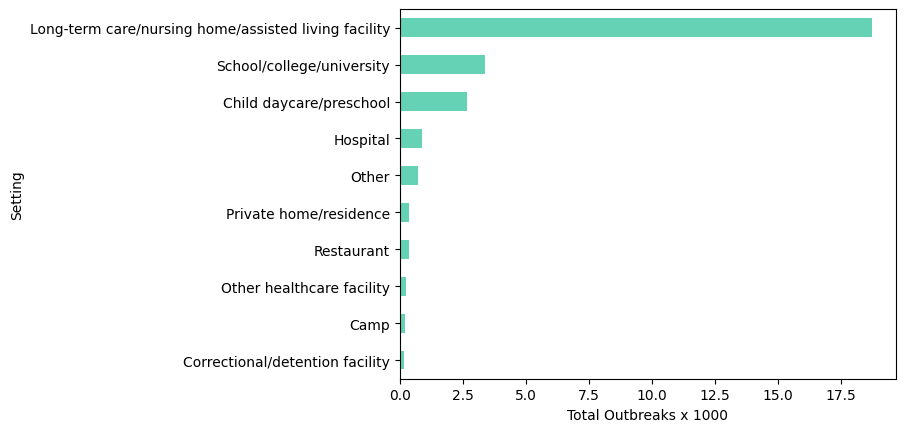

In [91]:
p_to_p_top10.tail(10).plot(kind = 'barh', xlabel = 'Total Outbreaks x 1000', color='#65D1B5', legend=False ,ylabel ='Setting' )

In [41]:
# food filter

food_mode = nors_df[nors_df['Primary Mode'] == 'Food']

In [92]:
# most frequent place where food mode is the way of infection

food_mode_plot = food_mode.groupby('Setting').agg({'index':'count'}).sort_values('index')/1000

<Axes: xlabel='Total Outbreaks x 1000', ylabel='Setting'>

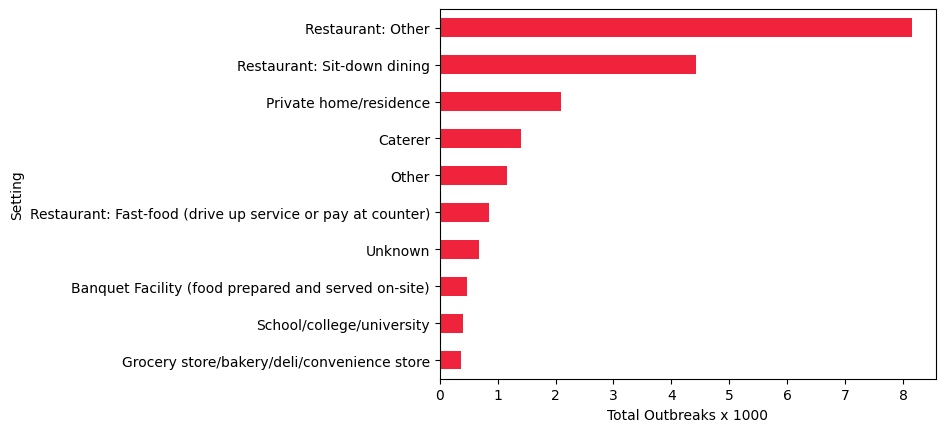

In [93]:
food_mode_plot.tail(10).plot(kind = 'barh', ylabel ='Setting' , legend=False , color='#ef233c',  xlabel = 'Total Outbreaks x 1000')

In [44]:
# water filter

water_mode = nors_df[nors_df['Primary Mode'] == 'Water']

In [98]:
# most frequent place where water mode is the way of infection

water_mode_plot = water_mode.groupby('Setting').agg({'index':'count'}).sort_values('index')/100

<Axes: xlabel='Total Outbreaks x 100', ylabel='Setting'>

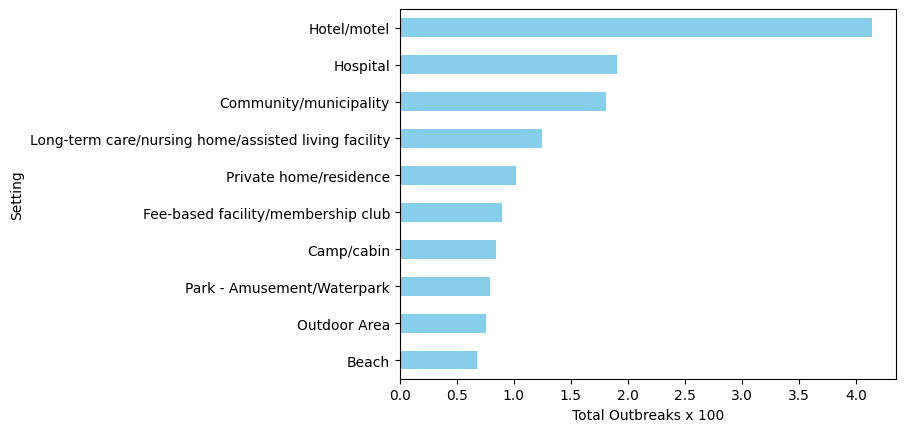

In [99]:
water_mode_plot.tail(10).plot(kind = 'barh', xlabel = 'Total Outbreaks x 100', legend=False, color='SkyBlue', ylabel ='Setting')

In [47]:
# outbreaks of nursing homes

nursing_outbreaks = nors_df[nors_df['Setting'].str.contains('nursing') == True]

In [94]:
#which type of food is more infected
food_type_plot = food_mode.groupby('IFSAC Category')[['index']].count().sort_values(by = 'index')/1000

<Axes: xlabel='Total Outbreaks x 1000', ylabel='Type of Food'>

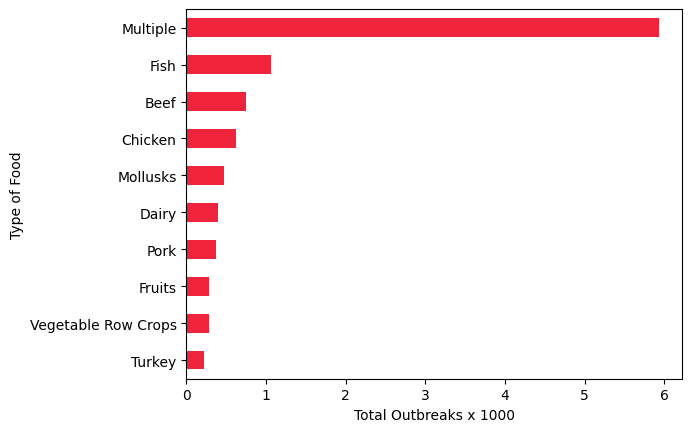

In [95]:
food_type_plot.tail(10).plot(kind = 'barh', xlabel = 'Total Outbreaks x 1000', ylabel = 'Type of Food', legend=False, color='#ef233c')

In [50]:
# which type of water is more infected
water_exposure_type = water_mode.groupby('Water Exposure')[['index']].count().sort_values(by = 'index',ascending= False)

In [96]:
water_mode_plot = water_mode.groupby('Water Type')[['index']].count().sort_values(by = 'index')/100

<Axes: xlabel='Total Outbreaks x 100', ylabel='Type of Water'>

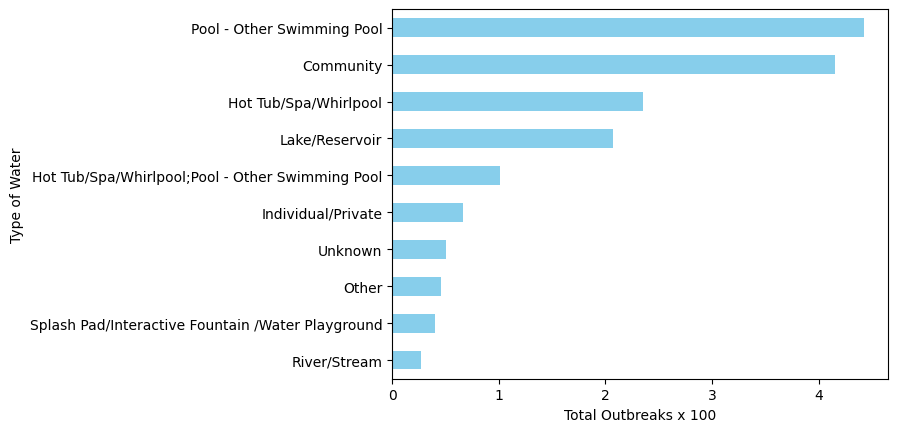

In [97]:
water_mode_plot.tail(10).plot(kind = 'barh', xlabel = 'Total Outbreaks x 100', ylabel = 'Type of Water', legend=False, color='SkyBlue')

In [53]:
#Data Frame percentage of Illnesses for each states
Avg_State = (nors_df.groupby('State')['index'].count() / nors_df['index'].count())*100 
Avg_State = Avg_State.to_frame(name='Percentage' ).reset_index()
Avg_State

,State,Percentage
0,Alabama,1.363063
1,Alaska,0.317426
2,Arizona,1.868766
3,Arkansas,0.242737
4,California,4.509313
5,Colorado,2.959528
6,Connecticut,1.535780
7,Delaware,0.210061
8,District of Columbia,0.152489
9,Florida,4.708482


In [156]:
# Write state abbreviations

extra_abbrev = {
    "district of columbia": "DC",
    "multistate": "MS",
    "republic of palau": "PW",
    "republic of the marshall islands": "MH",
    "guam": "GU",
    "puerto rico": "PR",
    "virgin islands": "VI"
}
Avg_State["Abbrev"] = Avg_State["State"].apply(
    lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else extra_abbrev.get(x.lower(), None)
)
Avg_State

,State,Percentage,Abbrev
0,Alabama,1.363063,AL
1,Alaska,0.317426,AK
2,Arizona,1.868766,AZ
3,Arkansas,0.242737,AR
4,California,4.509313,CA
5,Colorado,2.959528,CO
6,Connecticut,1.535780,CT
7,Delaware,0.210061,DE
8,District of Columbia,0.152489,DC
9,Florida,4.708482,FL


In [101]:
# map visual for % per state
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import us
pio.renderers.default = "notebook_connected"
colors = [
    "#E8FCF4",
    "#D4F7E8",
    "#C0F1DD",
    "#A7EBD3",
    "#8FE5C8",
    "#7EE3C3",
    "#6BDDB6",
    "#5EDAB3",
    "#4FD4A8",
    "#3DD6A3",
    "#36C698",
    "#2EBF91",
    "#27A681",
    "#208F73",
    "#1F8C70"
]

# Your choropleth
fig = px.choropleth(
    Avg_State,
    locations='Abbrev',
    locationmode='USA-states',
    color='Percentage',
    color_continuous_scale=colors,
    scope='usa'
)

top5 = Avg_State.sort_values(by='Percentage', ascending=False).head(5)
# Add text annotations
fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    locations=top5['Abbrev'],
    text=top5['Percentage'].round(1).astype(str) + '%', 
    mode='text',
    textfont=dict(color='Black', size=15, family='Arial'),
    showlegend=False
))

fig.update_layout(
    geo=dict(visible=False),
    title={
        'text': "Percentage of Outbreaks Per State",
        'y': 0.95,
        'x': 0.45,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20,
    autosize=True,
    dragmode=False
)

fig.show()


In [178]:
#Which are the top 5 states with the highest percentage of illnesses
top5_State = Avg_State.sort_values(by='Percentage', ascending=False).head(5)
top5_State

,State,Percentage,Abbrev
55,Wisconsin,5.838144,WI
37,Ohio,5.766568,OH
14,Illinois,5.254641,IL
24,Minnesota,4.846967,MN
9,Florida,4.708482,FL


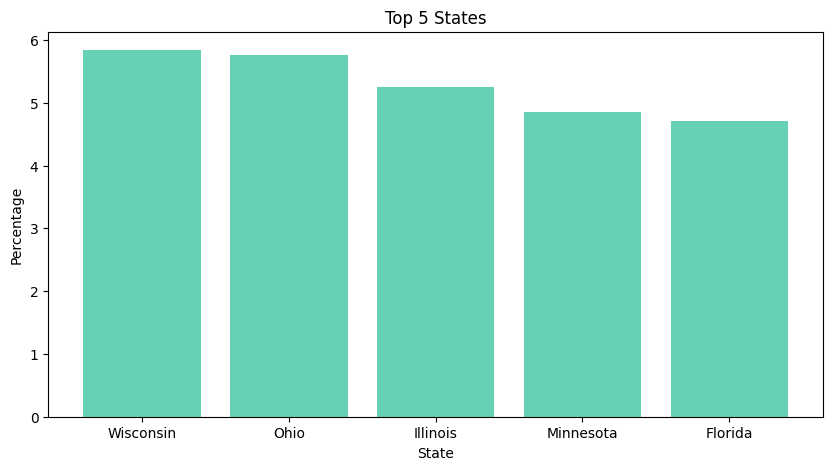

In [179]:
#Which are the top 5 states with the highest percentage of illnesses
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(top5_State['State'], top5_State['Percentage'], color='#65D1B5')
plt.title('Top 5 States')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.show()

In [58]:
#For the state of Wisconsin, what is the most common Primary Mode of illness transmission?
mode1 = nors_df[nors_df['State'] == 'Wisconsin']['Primary Mode']
mode_df = pd.DataFrame({
    'Primary Mode': mode1.value_counts().index,
    'Count': mode1.value_counts().values
})

mode_df

,Primary Mode,Count
0,Person-to-person,2759
1,Food,589
2,Indeterminate/unknown,276
3,Water,104
4,Animal contact,19
5,Environmental contamination other than food/water,5


In [103]:
# out breaks per year
outbreaks_by_year = nors_df[['Year']].value_counts().sort_index()
outbreaks_by_year = outbreaks_by_year.reset_index()
outbreaks_by_year.columns = ['Year', 'Outbreaks']
outbreaks_by_year = outbreaks_by_year.sort_values('Year').reset_index(drop=True)/1000

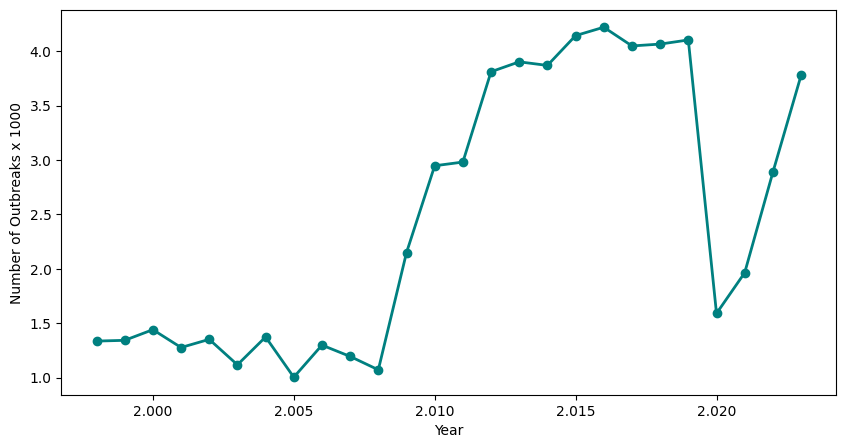

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(outbreaks_by_year['Year'], outbreaks_by_year['Outbreaks'], marker='o', color='teal', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Number of Outbreaks x 1000')
plt.show()

In [118]:
month_outbreaks=nors_df.groupby('Month')['Year'].count()/1000

In [119]:
month_outbreaks

Month
1     8.480
2     8.160
3     8.114
4     6.016
5     4.646
6     3.894
7     3.642
8     3.464
9     3.100
10    3.340
11    4.387
12    7.024
Name: Year, dtype: float64

In [120]:
# This bar chart shows the number of foodborne outbreaks for each month.
# It helps visualize which months have higher or lower outbreak activity.
month_outbreaks = month_outbreaks.reset_index()
month_outbreaks.columns = ['Month', 'Outbreaks']
month_outbreaks = month_outbreaks.sort_values('Month').reset_index(drop=True)

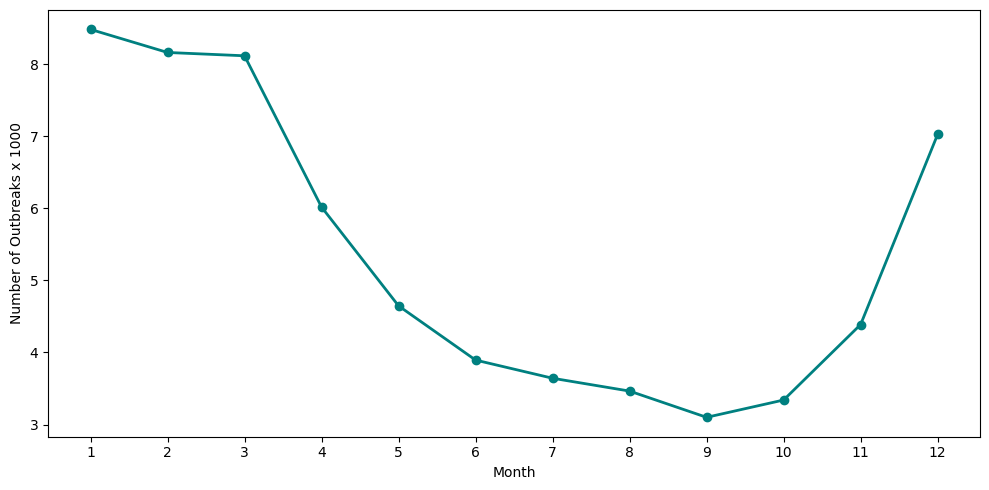

In [121]:
plt.figure(figsize=(10, 5))
plt.plot(month_outbreaks['Month'], month_outbreaks['Outbreaks'], marker='o', linewidth=2, color='teal')
plt.xlabel('Month')
plt.ylabel('Number of Outbreaks x 1000')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()